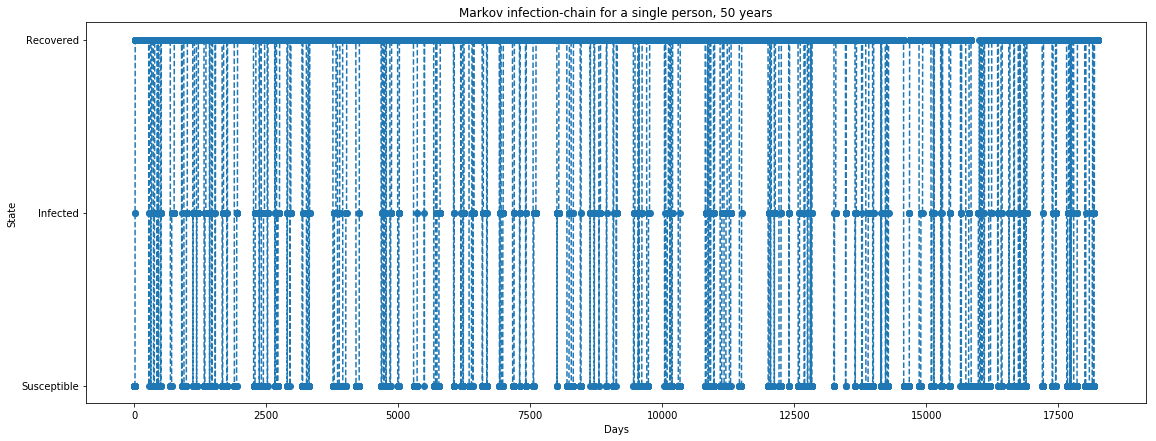

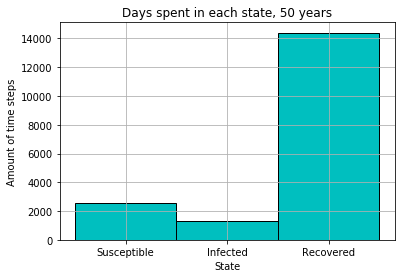

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.pyplot import figure
import statistics

#the code here is for task 1d

transition_matrix = [[0.95,0.05,0],[0,0.9,0.1],[0.01,0,0.99]]

state_vector=[1,0,0]

#this is to determine the next state
super_position_state=np.dot(state_vector, transition_matrix)


#making a function to determine the next state, partially randomly
def get_next_state(super_position_state):
    weight_precision=1000
    weight_sum=sum(super_position_state)
    weighted_state=map(lambda e: e*weight_precision/weight_sum, super_position_state)
    
    state_list=[]
    i=0
    for item in weighted_state:
        state_list+=[i]*int(item)
        i+=1
        
    new_state=[0]*len(super_position_state)
    new_state[random.choice(state_list)]=1
    #returning an array with the next state
    return new_state


#making a function that returns a list with the states the person has been in
def simulate_markov(days,super_position_state):
    index_list=[0]
    step_list=[0]
    avg_step_list=[0]
    

    for i in range(days):    
        u_new=get_next_state(super_position_state)
        super_position_state=np.dot(u_new,transition_matrix)
        index_list.append(u_new.index(1))
    #the indices of the function represents the time steps
    return index_list

#making a function that graphs the markov function
def show_markov_graph(index_list):
    days=len(index_list)
    n= np.linspace(0,days,days)
    plt.figure(figsize=(19,7))
    #graphing the timesteps and states
    plt.title("Markov infection-chain for a single person, 50 years")
    plt.xlabel("Days")
    plt.ylabel("State")
    plt.plot(n,index_list,"--o")
    y=[0,1,2]
    plt.yticks(y,("Susceptible","Infected","Recovered"))
    plt.savefig('twntyearloop.pdf',bbox_inches="tight")
    plt.show()
    #graphing a histogram of the days spent in each state
    plt.title("Days spent in each state, 50 years")
    x=[0.5,1.5,2.5]
    plt.hist(index_list,bins=[0,1,2,3],color='c',edgecolor='k')
    plt.xticks(x,("Susceptible","Infected","Recovered"))
    plt.xlabel("State")
    plt.ylabel("Amount of time steps")
    plt.grid()
    plt.savefig('twntyearloop1.pdf')
    plt.show()




transition_matrix = [[0.95,0.05,0],[0,0.9,0.1],[0.01,0,0.99]]

state_vector=[1,0,0]

#this is to determine the next state
super_position_state=np.dot(state_vector, transition_matrix)

#graphing
index_list=simulate_markov(18250,super_position_state)
show_markov_graph(index_list)


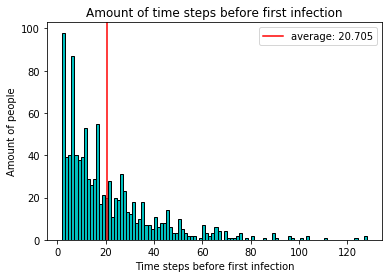

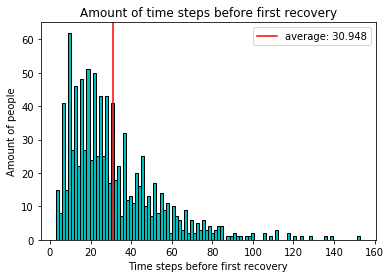

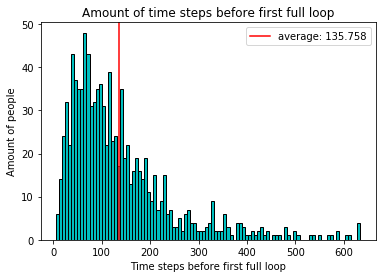

In [6]:
#the code here is used in task 1d as well

#making a function that checks when the first time a person transitions to a new state
def time_till_first(inlist):
    #first_list has [time till infection, time till recovery, time till full chain]
    first_list=[]
    j=0
    for i in range(1,3):
        while inlist[j]<(i):
            j+=1
        first_list.append(j+1)
    while inlist[j]!=0:
        j+=1
    first_list.append(j+1)
    return first_list

firstie=time_till_first(index_list)

#simulating 1000 different situations
inf=[]
rec=[]
fulls=[]
for i in range(1000):
    index_list=simulate_markov(18250,super_position_state)
    first_list=time_till_first(index_list)
    inf.append(first_list[0])
    rec.append(first_list[1])
    fulls.append(first_list[2])
    

#plotting time steps before first infection thousand times, population of 1000
plt.title("Amount of time steps before first infection")
plt.hist(inf,bins=100, color='c',edgecolor='k')
plt.axvline(statistics.mean(inf), color='r',label='average: '+str(statistics.mean(inf)))
plt.xlabel("Time steps before first infection")
plt.ylabel("Amount of people")
plt.legend()
plt.savefig('firstinf.pdf')
plt.show()

#plotting time steps before first recovery, population of 1000
plt.title("Amount of time steps before first recovery")
plt.hist(rec,bins=100,color='c',edgecolor='k')
plt.axvline(statistics.mean(rec), color='r',label='average: '+str(statistics.mean(rec)))
plt.xlabel("Time steps before first recovery")
plt.ylabel("Amount of people")
plt.legend()
plt.savefig('fistrec.pdf')
plt.show()

#plotting time steps before first full loop, population of 1000
plt.title("Amount of time steps before first full loop")
plt.hist(fulls,bins=100,color='c',edgecolor='k')
plt.axvline(statistics.mean(fulls), color='r',label='average: '+str(statistics.mean(fulls)))
plt.xlabel("Time steps before first full loop")
plt.ylabel("Amount of people")
plt.legend()
plt.savefig('firstloop.pdf')
plt.show()

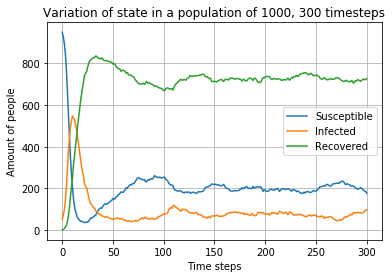

In [4]:
#this is task 1f

#this is the inital state y0
state_vector=[950,50,0]

#making a function that simulates the change of state in a population of 1000
#we have the unknown variable beta, which varies according to I_n
def infection_simulation_beta(state_vector,days):
    sus_amt=[state_vector[0]]
    inf_amt=[state_vector[1]]
    rec_amt=[state_vector[2]]
    for i in range(days):
        beta=0.5 * (state_vector[1]/1000)
        #transition_matrix = [[1-beta,beta,0],[0,0.9,0.1],[0.01,0,0.99]]
        #using the binomial distribution for randomness
        #amount going from susp to other states
        susp_inf=np.random.binomial(state_vector[0],beta)
        susp_vec = [state_vector[0]-susp_inf,susp_inf,0]
        
        #going from inf to other states
        inf_rec=np.random.binomial(state_vector[1],0.1)
        inf_vec=[0,state_vector[1]-inf_rec,inf_rec]
        
        #going from rec to other states
        rec_susp=np.random.binomial(state_vector[2],0.01)
        rec_vec=[rec_susp,0,state_vector[2]-rec_susp]
        
        
        #adding the vectors together
        for i in range(3):
            state_vector[i]= susp_vec[i]+inf_vec[i]+rec_vec[i]
        
        
        
        sus_amt.append(state_vector[0])
        inf_amt.append(state_vector[1])
        rec_amt.append(state_vector[2])
        
        #returning three different vectors that each represent a state
    return sus_amt,inf_amt,rec_amt

sus_amt,inf_amt,rec_amt=infection_simulation_beta(state_vector,300)

days=np.linspace(0,300,301)

#plotting the variation of state in a population
plt.title("Variation of state in a population of 1000, 300 timesteps")
plt.plot(days,sus_amt,label="Susceptible")
plt.plot(days,inf_amt,label="Infected")
plt.plot(days,rec_amt,label="Recovered")
plt.xlabel("Time steps")
plt.ylabel("Amount of people")
plt.grid()
plt.legend()
plt.savefig('threehundreddays.pdf')
plt.show()

[950, 50, 0]


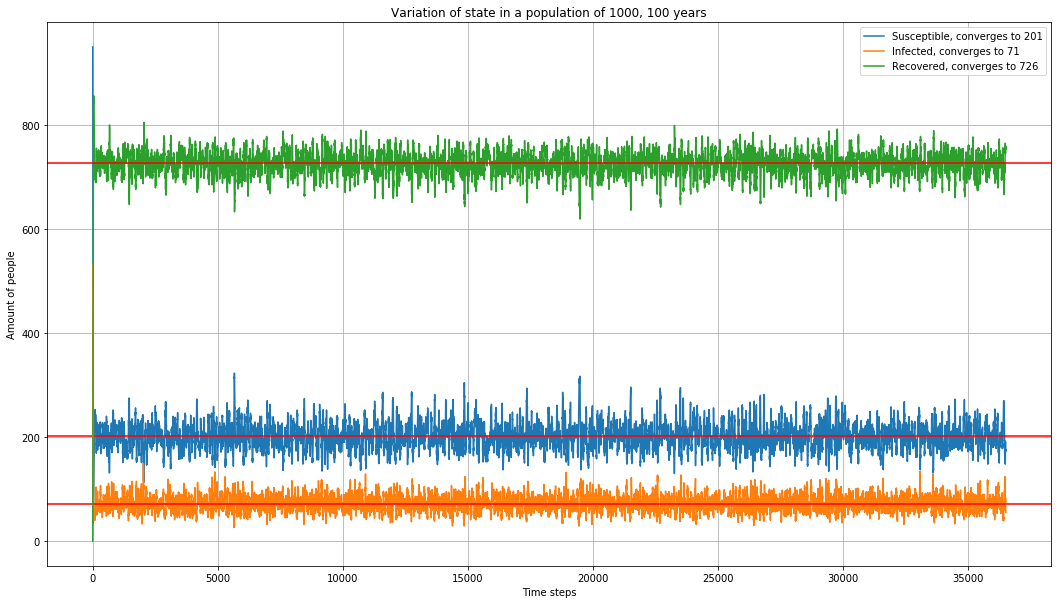

In [8]:
#this is task 1g

state_vector=[950,50,0]

days=np.linspace(0,36500,36501)

sus_amt,inf_amt,rec_amt=infection_simulation_beta(state_vector,36500)

#using the previous function made to simulate change in state in population over a long period of time
plt.figure(figsize=(18,10))
plt.title("Variation of state in a population of 1000, 100 years")
plt.plot(days,sus_amt,label="Susceptible, converges to "+str(int(statistics.median_grouped(sus_amt))))
plt.axhline(statistics.median_grouped(sus_amt), color='r')

plt.plot(days,inf_amt,label="Infected, converges to "+str(int(statistics.median_grouped(inf_amt))))
plt.axhline(statistics.median_grouped(inf_amt), color='r')


plt.plot(days,rec_amt,label="Recovered, converges to "+str(int(statistics.median_grouped(rec_amt))))
plt.axhline(statistics.median_grouped(rec_amt), color='r')


plt.xlabel("Time steps")
plt.ylabel("Amount of people")
plt.grid()
plt.legend()
plt.savefig('hundredyears.pdf')
plt.show()

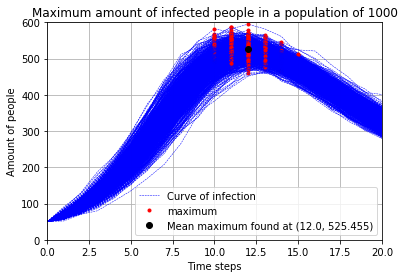

In [5]:
#this is task 1h



max_list=[]
max_index_list=[]
#plotting the maximum of the infected curve
plt.title("Maximum amount of infected people in a population of 1000")
for i in range(999):
    state_vector=[950,50,0]
    days=np.linspace(0,300,301)
    sus_amt,inf_amt,rec_amt=infection_simulation_beta(state_vector,300)
    inf_max=max(inf_amt)
    index_max=inf_amt.index(inf_max)
    max_list.append(inf_max)
    max_index_list.append(index_max)
    plt.plot(days,inf_amt,"--b",linewidth=0.5)
    plt.plot(index_max,inf_max,"r.")
state_vector=[950,50,0]
days=np.linspace(0,300,301)
sus_amt,inf_amt,rec_amt=infection_simulation_beta(state_vector,300)
inf_max=max(inf_amt)
index_max=inf_amt.index(inf_max)
max_list.append(inf_max)
max_index_list.append(index_max)
plt.plot(days,inf_amt,"--b",label="Curve of infection",linewidth=0.5)
plt.plot(index_max,inf_max,"r.",label="maximum")
plt.xlabel("Time steps")
plt.ylabel("Amount of people")
plt.grid()
plt.legend()
plt.savefig('infmax.pdf')
#zooming in on the curve
plt.xlim(0,20)
plt.ylim(0,600)
plt.plot(round(np.mean(max_index_list)),np.mean(max_list),"ok",label="Mean maximum found at ("+str(round(np.mean(max_index_list)))+", "+str(np.mean(max_list))+")",linewidth=5)
plt.legend()
plt.savefig('infmaxzoom.pdf')
plt.show()

In [6]:
#this is task 1h

max_list=[]
max_index_list=[]

#finding the mean maximum and the variance of the maximum for 1000 realizations of outbreaks
for i in range(1000):
    state_vector=[950,50,0]
    days=np.linspace(0,300,301)
    sus_amt,inf_amt,rec_amt=infection_simulation_beta(state_vector,300)
    inf_max=max(inf_amt)
    index_max=inf_amt.index(inf_max)
    max_list.append(inf_max)
    max_index_list.append(index_max)
    
    

print("The mean max is ", np.mean(inf_max))
print("And the max is usually found on day", np.mean(max_index_list))

The mean max is  571.0
And the max is usually found on day 11.905
